In [1]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log = pm4py.read_xes("../data/BPI_Challenge_2019-3-w-after.xes")
event_log = pm4py.convert_to_event_log(log)

/Users/johanna/Desktop/UniMa/1. Semester/PMA/is515-case-group1/.venv/lib/python3.12/site-packages/pm4py/utils.py:986: UserWarning: In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.
  warnings.warn("In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.")


In [3]:
vendor_item_list = []

for trace in event_log:
    vendor = trace.attributes.get("(case) Vendor")
    item = trace.attributes.get("(case) Item")
    trace_id = trace.attributes.get("concept:name")

    vendor_item_list.append({
        "trace_id": trace_id,
        "vendor": vendor,
        "item": item
    })

df_vendor_items = pd.DataFrame(vendor_item_list)
print(df_vendor_items)

               trace_id         vendor  item
0      2000000001_00001  vendorID_0001     1
1      2000000002_00001  vendorID_0002     1
2      2000000005_00002  vendorID_0004     2
3      2000000006_00001  vendorID_0005     1
4      2000000008_00001  vendorID_0007     1
...                 ...            ...   ...
15177  4508075952_00020  vendorID_0236    20
15178  4508075952_00120  vendorID_0236   120
15179  4508075957_00010  vendorID_1140    10
15180  4508075962_00001  vendorID_0470     1
15181  4508075963_00001  vendorID_0234     1

[15182 rows x 3 columns]


In [4]:
unique_vendors = df_vendor_items["vendor"].nunique()
print("Unique vendors:", unique_vendors)

Unique vendors: 531


In [5]:
counts = df_vendor_items["vendor"].value_counts()
print(counts)

vendor
vendorID_0264    1214
vendorID_0236    1145
vendorID_0165     871
vendorID_0282     504
vendorID_0183     378
                 ... 
vendorID_1245       1
vendorID_1246       1
vendorID_1248       1
vendorID_1250       1
vendorID_1685       1
Name: count, Length: 531, dtype: int64


In [6]:
vendors_per_trace = []

for trace in event_log:
    vendors = {trace.attributes.get("(case) Vendor")}
    vendors.discard(None)

    vendors_per_trace.append({
        "trace_id": trace.attributes.get("concept:name"),
        "vendor_count": len(vendors),
        "vendors": list(vendors)
    })

import pandas as pd
df = pd.DataFrame(vendors_per_trace)

print(df.sort_values(by="vendor_count",ascending=False))

               trace_id  vendor_count          vendors
0      2000000001_00001             1  [vendorID_0001]
10126  4508049986_00001             1  [vendorID_0540]
10114  4508049792_00040             1  [vendorID_1086]
10115  4508049798_00040             1  [vendorID_0564]
10116  4508049819_00080             1  [vendorID_0563]
...                 ...           ...              ...
5064   4507024062_00001             1  [vendorID_0364]
5065   4507024063_00001             1  [vendorID_0365]
5066   4507024064_00001             1  [vendorID_0366]
5067   4507024065_00001             1  [vendorID_0234]
15181  4508075963_00001             1  [vendorID_0234]

[15182 rows x 3 columns]


In [7]:
df_vendor_items.groupby("vendor")["item"].unique()

vendor
vendorID_0001     [1]
vendorID_0002     [1]
vendorID_0004     [2]
vendorID_0005     [1]
vendorID_0006     [1]
                 ... 
vendorID_1681    [10]
vendorID_1682    [10]
vendorID_1683    [10]
vendorID_1684    [10]
vendorID_1685    [10]
Name: item, Length: 531, dtype: object

In [8]:
vendors_per_item = (
    df_vendor_items
    .groupby("vendor")["item"]
    .unique()
)

df_counts = vendors_per_item.apply(len).reset_index()
df_counts.columns = ["item", "item_count"]

print(df_counts[:10].sort_values(by="item_count",ascending=False))

            item  item_count
0  vendorID_0001           1
1  vendorID_0002           1
2  vendorID_0004           1
3  vendorID_0005           1
4  vendorID_0006           1
5  vendorID_0007           1
6  vendorID_0008           1
7  vendorID_0009           1
8  vendorID_0010           1
9  vendorID_0012           1


In [9]:
df_vendor_items.groupby("item")["vendor"].unique()


item
1       [vendorID_0001, vendorID_0002, vendorID_0005, ...
2       [vendorID_0004, vendorID_0029, vendorID_0042, ...
3       [vendorID_0041, vendorID_0028, vendorID_0029, ...
4                          [vendorID_0028, vendorID_0917]
5                          [vendorID_0917, vendorID_1588]
                              ...                        
1480                                      [vendorID_0119]
1550                                      [vendorID_0119]
1640                                      [vendorID_0119]
1670                                      [vendorID_0119]
1790                                      [vendorID_0119]
Name: vendor, Length: 128, dtype: object

In [10]:
vendors_per_item = (
    df_vendor_items
    .groupby("item")["vendor"]
    .unique()
)

df_counts = vendors_per_item.apply(len).reset_index()
df_counts.columns = ["item", "vendor_count"]

print(df_counts[:10].sort_values(by="vendor_count",ascending=False))

   item  vendor_count
7    10           302
0     1           231
8    20           146
9    30           103
1     2            10
2     3             7
3     4             2
4     5             2
5     6             1
6     7             1


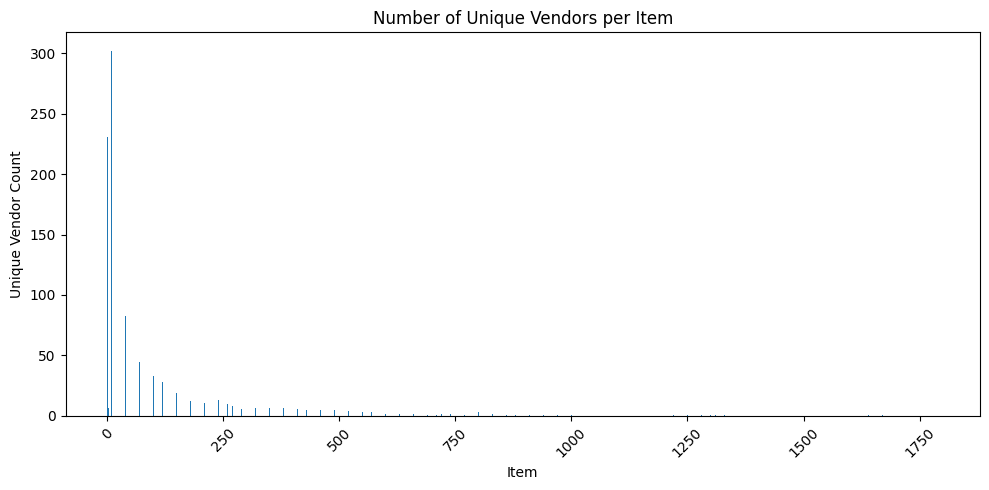

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(df_counts["item"], df_counts["vendor_count"])
plt.xlabel("Item")
plt.ylabel("Unique Vendor Count")
plt.title("Number of Unique Vendors per Item")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
spend_areas = []

for trace in event_log:
    spend_area = trace.attributes.get("(case) Spend area text")
    trace_id = trace.attributes.get("concept:name")
    
    spend_areas.append({
        "trace_id": trace_id,
        "spend_area": spend_area
    })

df_spend = pd.DataFrame(spend_areas)

spend_area_counts = df_spend["spend_area"].value_counts()

print(spend_area_counts)

spend_area
Logistics                  4602
Packaging                  4332
Sales                      2610
Trading & End Products      868
CAPEX & SOCS                463
Marketing                   454
Latex & Monomers            386
Additives                   351
Others                      244
Enterprise Services         171
Pigments & Colorants        120
Workforce Services          102
Specialty Resins             89
Solvents                     38
Spend Area Unidentified      25
Commodity Resins             23
Titanium Dioxides             7
Real Estate                   1
Name: count, dtype: int64


In [13]:
records = []

for trace in event_log:
    records.append({
        "trace_id": trace.attributes.get("concept:name"),
        "item": trace.attributes.get("(case) Item"),
        "vendor": trace.attributes.get("(case) Vendor"),
        "spend_area": trace.attributes.get("(case) Spend area text"),
    })

df = pd.DataFrame(records)

In [14]:
combo_vendor_map = (
    df.groupby(["spend_area", "item"])["vendor"]
    .unique()
    .reset_index()
)

print(combo_vendor_map)

             spend_area  item  \
0             Additives    10   
1             Additives    20   
2             Additives    30   
3             Additives    40   
4             Additives    50   
..                  ...   ...   
378  Workforce Services     2   
379  Workforce Services    10   
380  Workforce Services    20   
381  Workforce Services    30   
382  Workforce Services    40   

                                                vendor  
0    [vendorID_0166, vendorID_0183, vendorID_0036, ...  
1    [vendorID_0166, vendorID_0229, vendorID_0867, ...  
2    [vendorID_0519, vendorID_0229, vendorID_1059, ...  
3    [vendorID_0519, vendorID_0508, vendorID_1059, ...  
4                       [vendorID_0166, vendorID_0519]  
..                                                 ...  
378                                    [vendorID_0004]  
379                     [vendorID_1098, vendorID_1520]  
380                                    [vendorID_1098]  
381                              